## Problem #1: Investing and Bayes' Theorem

Bayes’ Theorem states the following for any two events A and B:

P(A|B) = P(A)*P(B|A) / P(B)

where:

* P(A|B): The probability of event A, given event B has occurred.
* P(B|A): The probability of event B, given event A has occurred.
* P(A): The probability of event A.
* P(B): The probability of event B.

Assume that there are two investment options, A and B. The probability of generating positive returns from investment A is 81%, and the probability of generating positive returns from investment B is 62%. Also, the possibility of investment B providing a positive return when investment A also provides a positive return is 11%.

**Instructions:** Using the provided information, determine the probability of investment A providing a positive return when investment B also provides a positive return. Return pAB formatted as a percentage to two decimal places (30.24%, not 0.3024). 

In [ ]:
# Create function to calculate Bayes' Theorem
def bayesTheorem(pA, pB, pBA):
    # Add your code here, returning a percentage representing pAB
    pAB = '{:.2%}'.format((pBA * pA) / pB)
    return pAB

# Define probabilities
pA = 0.81
pB = 0.62
pBA = 0.11

# Use function to calculate conditional probability
print(bayesTheorem(pA, pB, pBA))

14.37%


## Problem #2: Daily Returns of Stocks

**Instructions:** Follow the steps below and add code where needed to complete problem two. 

Install the yfinance package by running the code below. This will download market data from Yahoo! Finance's API.

In [140]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Choose five well-known stocks (ex: AAPL, META, AMZN) and add their tickers to tickers_list. We are going to import daily stock price data for those five stocks over the past year. Then print out the first five rows of the data. 

https://www.geeksforgeeks.org/get-first-n-records-of-a-pandas-dataframe/

In [143]:
import pandas as pd
# Add the stock tickers you chose to the list
tickers_list = ['AAPL', 'META', 'AMZN','GOOGL','UPS']

# Get the data for these stocks for the past year (2022-2023)
import yfinance as yf
data = yf.download(tickers_list,start ='2022-1-1', end='2023-1-1')['Adj Close']
print(data.shape)
print(type(data))

# Print the first 5 rows of the data
print(data.iloc[:5])
# Make sure all stocks have do not have "NaN" values, else choose a new stock
# print(data == 'NaN')
if True in data == 'NaN':
  print("There are 'Nan' values")
else:
  print("Without 'Nan' values")

[*********************100%***********************]  5 of 5 completed
(251, 5)
<class 'pandas.core.frame.DataFrame'>
                                 AAPL        AMZN       GOOGL        META  \
Date                                                                        
2022-01-03 00:00:00-05:00  180.959747  170.404495  144.991501  338.540009   
2022-01-04 00:00:00-05:00  178.663071  167.522003  144.399506  336.529999   
2022-01-05 00:00:00-05:00  173.910660  164.356995  137.774994  324.170013   
2022-01-06 00:00:00-05:00  171.007523  163.253998  137.747498  332.459991   
2022-01-07 00:00:00-05:00  171.176529  162.554001  137.016998  331.790009   

                                  UPS  
Date                                   
2022-01-03 00:00:00-05:00  206.660706  
2022-01-04 00:00:00-05:00  210.329285  
2022-01-05 00:00:00-05:00  207.686722  
2022-01-06 00:00:00-05:00  209.700104  
2022-01-07 00:00:00-05:00  211.171402  
Without 'Nan' values


Now we are going to estimate the daily log returns for each stock. The logarithmic return is a way of calculating the rate of return on an investment.

For example, if a stock is priced at 3.570 USD per share at the close on one day, and at 3.575 USD per share at the close the next day, then the logarithmic return is: ln(3.575/3.570) = 0.0014, or 0.14%.

You will need to use two functions to calculate the daily log returns using the list data you just created. Look into Numpy functions log() and diff(). Print out the last five rows of returns. 

In [144]:
from numpy.ma import row_stack
import numpy as np
import pandas as pd

# Calculate daily log returns using log() and diff() 
def returns(data):
  daily_log = np.log(data)
  diff_of_array = np.diff(daily_log, axis=0)
  df_data = pd.DataFrame(diff_of_array)
  col_name = data.columns
  row_name = data.iloc[1:, :].index
  #print(type(row_name))
  df_data.columns = col_name
  df_data.index = row_name
  return df_data

# Print out the first five rows of returns
returns(data).iloc[:5]

,AAPL,AMZN,GOOGL,META,UPS
Date,,,,,
2022-01-04 00:00:00-05:00,-0.012773,-0.017060,-0.004091,-0.005955,0.017596
2022-01-05 00:00:00-05:00,-0.026960,-0.019074,-0.046962,-0.037419,-0.012644
2022-01-06 00:00:00-05:00,-0.016834,-0.006734,-0.000200,0.025251,0.009648
2022-01-07 00:00:00-05:00,0.000988,-0.004297,-0.005317,-0.002017,0.006992
2022-01-10 00:00:00-05:00,0.000116,-0.006592,0.011988,-0.011275,-0.029917


https://blog.csdn.net/qq_18351157/article/details/110683329

https://blog.csdn.net/qq_28077617/article/details/120144407

Now we will output the covariance matrix. From the CSE 801A slides from last week, we learned that a covariance matrix indicates the degree to which two variables vary together. 

Covariance provides the a measure of strength of correlation between two variable or more set of variables. The covariance matrix element Cij is the covariance of xi and xj. The element Cii is the variance of xi. 

*   If COV(xi, xj) = 0 then the variables are uncorrelated
*   If COV(xi, xj) > 0 then the variables are positively correlated
*   If COV(xi, xj) < 0 then the variables are negatively correlated

Add code to generate a covariance matrix from the returns and a heatmap using seaborn to visualize the covariance matrix. When you are done, it should look similar to this: 

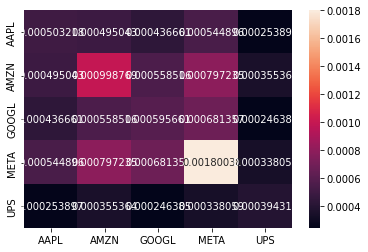


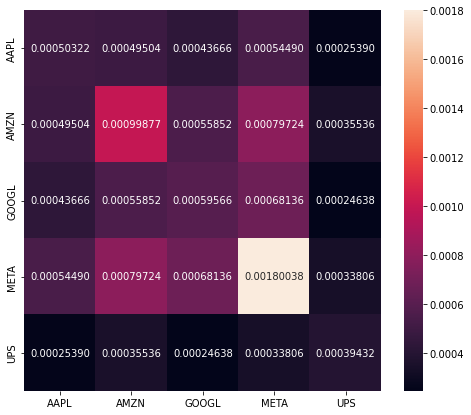

In [145]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

# Generate covariance matrix

cov_matrix = np.cov(returns(data).T)
cov_matrix

# Generate heatmap using seaborn and matplotlib to visualize the covariance matrix
axis_labels = ['AAPL',	'AMZN',	'GOOGL',	'META',	'UPS'] # labels for axis

f, ax = plt.subplots(figsize=(8, 7))
data_heatmap = sn.heatmap(cov_matrix, fmt = '.8f', annot=True, ax = ax, xticklabels=axis_labels, yticklabels=axis_labels)


Explain the results of your covariance matrix heatmap below in a few sentences. 


The covariances are all extremely near to zero. This indicates that there isn't a very significant correlation in each stock's daily log.



Next, calculate the mean returns for each stock in the returns list. You can find a function in Numpy to do this for you. 

In [146]:
# Calculate mean returns for each stock
avg_returns = np.mean(returns(data), axis = 0)
avg_returns

AAPL    -0.001325
AMZN    -0.002829
GOOGL   -0.001987
META    -0.004137
UPS     -0.000692
dtype: float64

We would like to visualize the daily returns of the stocks. Using matplotlib, plot the returns. Make sure to include a label for the x axis called "Date", a label for the y axis called "Log Returns in Dollars", a title called "Stock Daily Returns", and a legend for the stock tickers you chose. 

When you are done, your plot should look like this: 

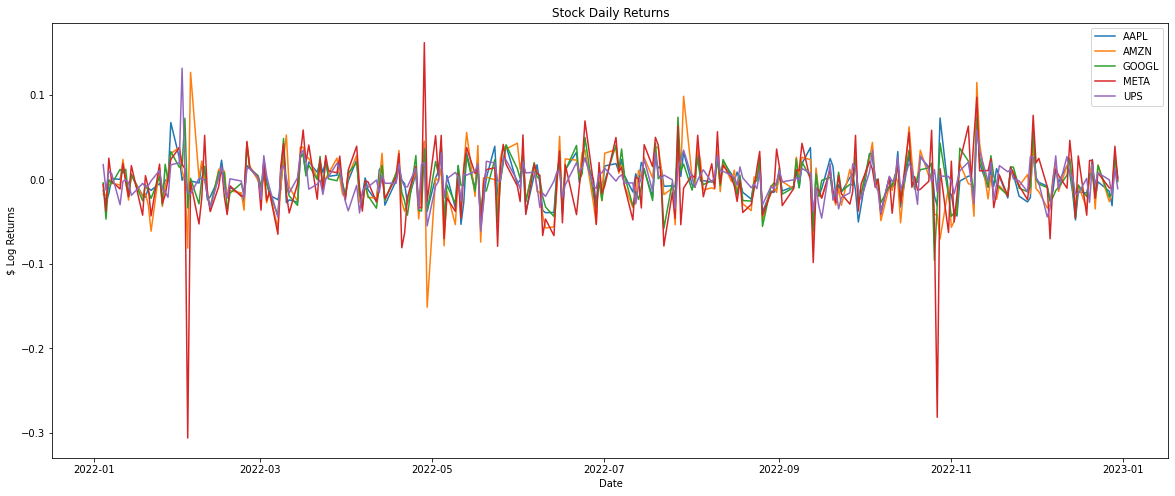

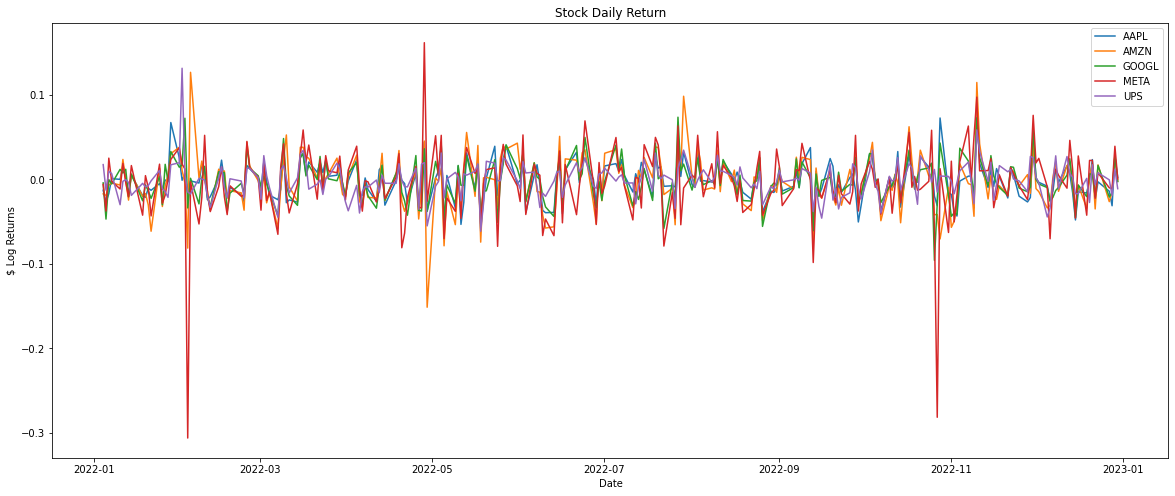

In [147]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot returns
plt.figure(figsize=(20,8))

plt.plot(returns(data)['AAPL'], label= 'AAPL')
plt.plot(returns(data)['AMZN'], label= 'AMZN')
plt.plot(returns(data)['GOOGL'], label= 'GOOGL')
plt.plot(returns(data)['META'], label= 'META')
plt.plot(returns(data)['UPS'], label= 'UPS')

x = np.arange(2022-1, 2023-1, 2)

plt.xlabel("Date")
plt.ylabel("$ Log Returns")
plt.title('Stock Daily Return')
plt.legend()
plt.show()
